# 04 - Gradient Descent

The next part of the linear regression algorithm is the optimization of our parameters $\theta_0$ and $\theta_1$.

In Exercise 03, we have seen what is a cost function and how to use it to calculate the error associated with estimations on the whole dataset. Then, we have tried multiple parameter combinations to see the effect on the error and find good parameter values.

However, it is quite computing demanding to calculate the error for a lot of combinations: imagine doing so with big functions like neural networks that can have millions of parameters!

Fortunately, there is another way: we can *minimize* the cost function to find good parameter values. To do so, we need to find how to update each parameter (should we increase or decrease the its value). For each parameter, the right direction is given by the slope on the cost function. And since the slope of a function is given by its derivative, we use the cost function derivative! Don't worry, we'll do that one step at a time!

When we say: "for each parameter", this means that we calculate the derivative with respect to each parameter separately. This is called *partial derivatives*. Then, we can stack all these partial derivatives (one per parameter) in a vector. This vector is called the *gradient* of the function. This why we call this procedure *gradient descent*: we use the gradient to minimize the function.

However, we will simplify the problem in this exercise and use only one variable.


## Setup

Let's start with regular imports and functions from previous exercises. You will also load some data using the file format `h5` to be sure that you can start fresh.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("../data/ciqual_small.csv")

You can get these functions from previous exercises:

In [3]:
 def h(x, theta0, theta1):
    # TODO: Take h() from Exercise 01
    pass

def L(x, y, theta0, theta1):
    # TODO: Take L() from Exercise 02
    pass

def plot_reg_line(x, y, theta0, theta1):
    # TODO: Take plot_reg_line() from Exercise 02
    pass

In [24]:
def h(x, theta0, theta1):
    y_pred = theta0 + theta1 * x
    return y_pred

def L(x, y, theta0, theta1):
    y_hat = h(x, theta0, theta1)
    m = x.shape[0]
    return (1 / (2 * m)) * np.sum((y_hat - y) ** 2)

def plot_reg_line(x, y, theta0, theta1):
    x_line = np.arange(x.min() - x.min() / 10,
                       x.max() + x.max() / 10,
                      0.1)
    y_line = theta0 + theta1 * x_line

    sns.scatterplot(x, y)
    plt.plot(x_line, y_line)

Here some variables from Exercise 03 that we'll need here:

In [58]:
import h5py

hf = h5py.File('../data/data_exercises.h5', 'r')

cost_all_stand = np.array(hf.get('cost_all_stand'))
cost_all = np.array(hf.get('cost_all'))

best_params = np.array(hf.get('best_params'))
best_params_stand = np.array(hf.get('best_params_stand'))

best_theta0 = np.array(hf.get('best_theta0')).reshape(-1)[0]
best_theta1 = np.array(hf.get('best_theta1')).reshape(-1)[0]
best_theta0_stand = np.array(hf.get('best_theta0_stand')).reshape(-1)[0]
best_theta1_stand = np.array(hf.get('best_theta1_stand')).reshape(-1)[0]

theta0_grid = np.array(hf.get('theta0_grid'))
theta1_grid = np.array(hf.get('theta1_grid'))
theta0_grid_zoom = np.array(hf.get('theta0_grid_zoom'))
theta1_grid_zoom = np.array(hf.get('theta1_grid_zoom'))

hf.close()

## Is Our Cost Function Convex?

#### Important Note

In this part, we will use the standardized data. It will be easier to look at the shape of the cost function! In latter parts, we will use raw data however. So for now, use the variables `cost_all_stand`, `theta0_grid_zoom`, `theta1_grid_zoom` and not `cost_all`, `theta0_grid` and `theta0_grid`!

As a first task, you will check the shape of the cost function that you have implemented in Exercise 03. We should find that our cost function is *convex* (think of it as a bowl-shaped function), which is good for gradient descent.

Your first task is to plot the cost functions separately for the two parameters `theta0` and `theta1`. You should do two plots:

- the cost in function of `theta0` taking a fixed value of `theta1` (its best value: `best_theta1`)
- the cost in function of `theta1` taking a fixed value of `theta0` (its best value: `best_theta0`)


In [12]:
# Your code here


Let's plot the cost in function of `theta0`. We keep the values of `theta0` for the best `theta1` value.

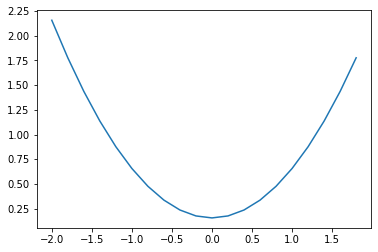

In [13]:
plt.plot(theta0_grid_zoom, cost_all_stand[:, best_params_stand[1]])

And then the cost in function of `theta1`, while using the best value of `theta0`:

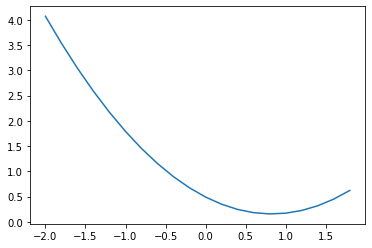

In [14]:
plt.plot(theta1_grid_zoom, cost_all_stand[best_params_stand[0], :])

You can see that the cost functions looks convex for both parameters.

It could be even more informative to plot the cost function according to both parameters at the same time. To do that, you will create a three-dimensional plot with Matplotlib.

Your task is to plot the cost function using a surface plot.

<details>
<summary>hint</summary>
https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html
</details>


<details>
<summary>hint 2</summary>
https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html
</details>

You can also run `%matplotlib notebook` to make the plot interactive and be able to move the shape. To come back to static plots, run `%matplotlib inline` instead.


In [15]:
%matplotlib notebook

In [16]:
# Your code here


<IPython.core.display.Javascript object>


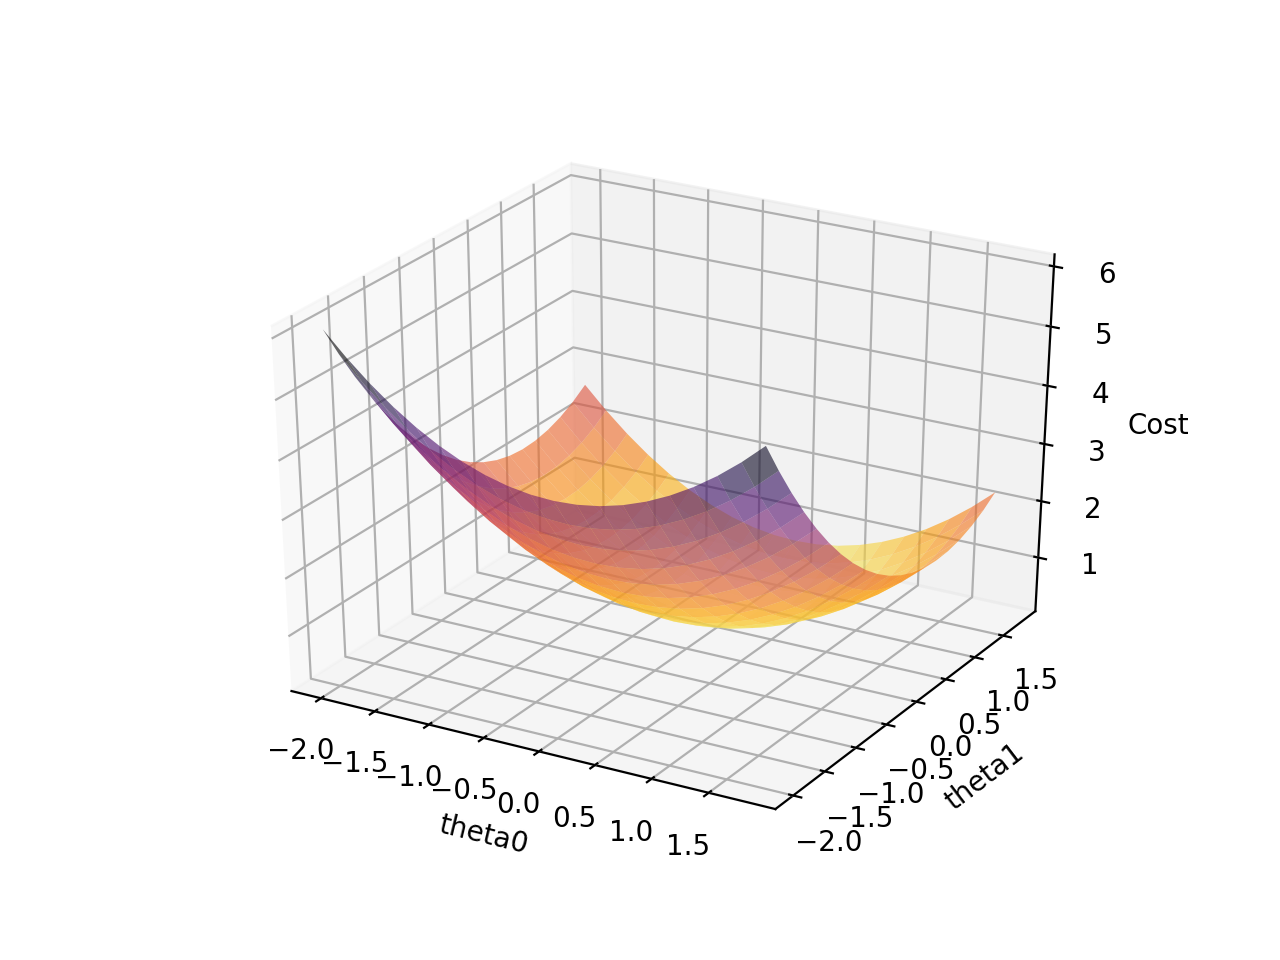

Text(0.5, 0, 'Cost')

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x0, x1 = np.meshgrid(theta0_grid_zoom, theta1_grid_zoom)

ax.plot_surface(x0, x1, cost_all_stand.T, cmap='inferno_r', alpha=0.6)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')


You can also add a vertical line corresponding to the the best parameters:

In [18]:
# Your code here


<IPython.core.display.Javascript object>


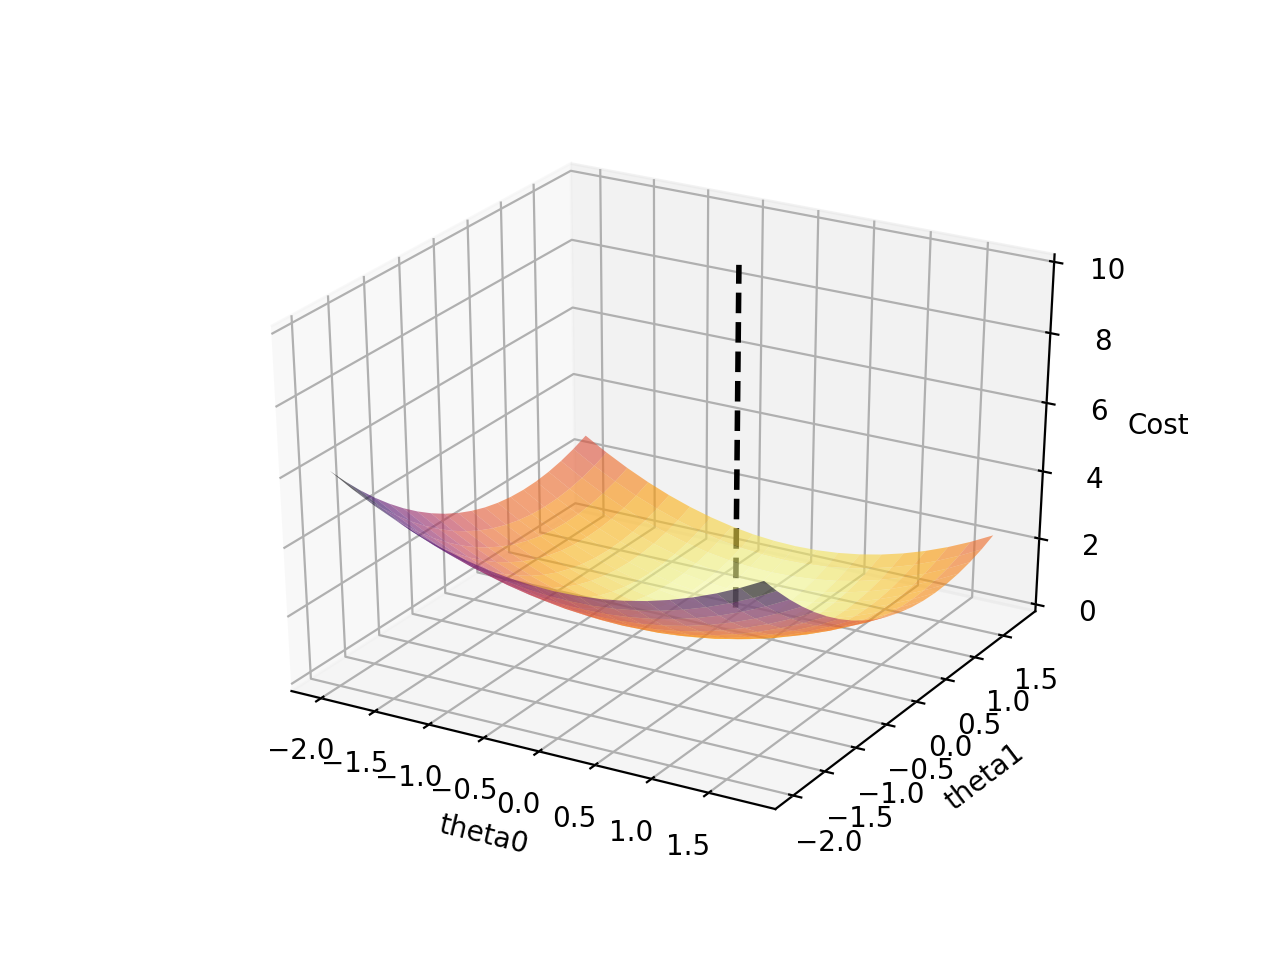

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x0, x1 = np.meshgrid(theta0_grid_zoom, theta1_grid_zoom)

ax.plot_surface(x0, x1, cost_all_stand.T, cmap='inferno_r', alpha=0.6)

ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')

ax.plot([best_theta0_stand, best_theta0_stand],
        [best_theta1_stand, best_theta1_stand],
        [0, 10],
        'k--',
        linewidth=2)


#### Important Note

Be careful and remember that we use `cost_all_stand` in this exercise. This is only to visualize the gradient descent process. In a real setting, you don't need to calculate the cost for all combinations of parameters. This is the point of gradient descent!

In [20]:
%matplotlib inline

## Gradient

#### Important Note

In this part, we will use the raw data instead of the standardized data. This will allows us to see issues like learning rate more clearly. So be sure to use the variables `cost_all` and `data`, `theta0_grid`, `theta1_grid` and not `cost_all_stand`, `data_stand`, `theta0_grid_zoom`, `theta0_grid_zoom`!

The goal of gradient descent it to tell at any point on the convex curve: what is the direction that would minimize the function, according to each direction (each parameter)?

In this exercise, we'll simplify the procedure and consider only one variable. Let's say that we constrain `theta0` (the intercept) to be 0: we only need to optimize the cost function with respect to `theta1` (the slope).

So we'll freeze the value of `theta0` to 0 and zero-initialize the value of `theta1`:

In [21]:
theta1 = 0

To visualize what gradient descent do, let's plot again the cost in function of `theta1`, this time with `theta0 = 0`. You can also try to plot the initial value of `theta1` as a point on the curve. 

In [22]:
# Your code here


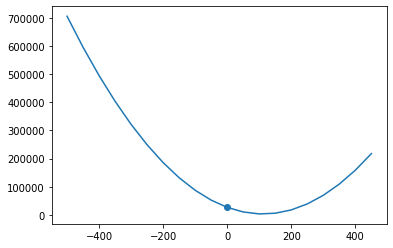

In [27]:
cost_for_theta1 = L(x=data['Zinc (mg/100g)'],
                    y=data['Phosphorus (mg/100g)'],
                    theta0=0,
                    theta1=theta1)

index_theta0 = np.where(theta1_grid == 0)[0][0]

plt.plot(theta1_grid, cost_all[index_theta0])
plt.scatter(theta1, cost_for_theta1)

Great! We have represented the cost function that we want to minimize. We also initialized our single parameter `theta1`. We have represented this initial value on the curve.

Now, let's say that you could slide this point on the curve. What direction would you use to decrease the error?

- 1. Increase `theta1`
- 2. Decrease `theta1`

In [18]:
# Your answer here


The right answer is 1. because increasing `theta1` corresponds to moving to the right on the plot and that would have the effect to decrease the cost (smaller value on the y-axis).

This is good to be able to do that as a human. However, we need to let the algorithm do it alone. The solution is calculate the slope at this point:

- if the slope is negative, we need to increase the parameter value (red curve on the figure)
- if the slope is positive, we need to decrease the parameter value (green curve on the figure)

<img src="images/slopes.png" width="500">

Minimizing the function means finding the bottom of the bowl.

### Derivatives

To find the slope and thus the right direction for the next value of `theta1`, we need to calculate the derivative of the cost function.

To help you, here is the derivative of the cost function:

In [28]:
def cost_function_derivative(x, y, theta0, theta1):
    m = x.shape[0]
    derivative = (1 / m) * np.sum((h(x, theta0, theta1) - y) * x)
    return derivative

We have the cost function and its derivative implemented. Your task is to use the derivative function to calculate the slope of the cost function at our initial point. This point corresponds to our initial `theta1` (we initialized it to 0) and to our fixed `theta0` (also 0).

In [20]:
# Your code here


In [29]:
cost_function_derivative(x=data['Zinc (mg/100g)'],
                         y=data['Phosphorus (mg/100g)'],
                         theta0=0,
                         theta1=theta1)

-419.72169811320754

You should find $-419.72169811320754$.

The derivative is negative: this means that the slope of the tangent line at this point corresponding to the initial `theta1` value is negative (the $y$ value decreases when the $x$ value increases).

### Parameter Update

In addition to the sign of the derivative, the value is giving you some information as well. A large value means that the tangent line is steep and a small value means that the line is flat.

The gradient descent procedure uses this property: we update the parameter by subtracting the value of the derivative to the current value of theta. Your task is to implement this `update()` function.

In [22]:
# Your code here
def update(x, y, theta0, theta1):
    # TODO: the update function returns theta0 and theta1: the new value of theta1
    # and, since we freeze theta0, the unmodified value of it
    pass


In [30]:
def update(x, y, theta0, theta1):
    new_theta1 = theta1 - cost_function_derivative(x, y, theta0, theta1)
    return theta0, new_theta1

You can test your function with the following cell:

In [31]:
update(x=data['Zinc (mg/100g)'],
       y=data['Phosphorus (mg/100g)'],
       theta0=0,
       theta1=theta1)
# You should get (0, 419.72169811320754)

(0, 419.72169811320754)

If your tests are good, update your value of `theta1`:

In [32]:
theta0, theta1 = update(x=data['Zinc (mg/100g)'],
                y=data['Phosphorus (mg/100g)'],
                theta0=0,
                theta1=theta1)

Plot the new value of `theta1` on the cost function curve, like you did with the initial value.

In [26]:
# Your code here


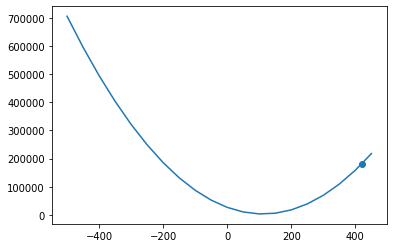

In [33]:
cost_for_theta1 = L(x=data['Zinc (mg/100g)'],
                    y=data['Phosphorus (mg/100g)'],
                    theta0=0,
                    theta1=theta1)

plt.plot(theta1_grid, cost_all[best_params[0]])
plt.scatter(theta1, cost_for_theta1)

What can you say about the cost with the updated `theta1`?

The cost is larger in the second iteration: this means that the algorithm might not improve (but is getting worse). We will see why below.

### Putting All Together

You have all the building blocks needed to implement gradient descent. Before fixing the issue of the increasing cost, you will put all these blocks together to implement the gradient descent function. To summarize, here is the procedure:

1. Give parameters initial values (zero-initialization)
2. Calculate the estimated values with these parameters for all training examples
3. Calculate the error between the estimated values and the true values with the cost function `L()`
4. Calculate the derivative of the cost function according to these parameters
5. Update the parameters by subtracting the derivative (`theta0` stays 0)
6. Repeat steps 2 to 5 (each repetition corresponds to one *epoch*)

You can try to write a function that will take `x`, `y` and the initial value of `theta1` as inputs and implement these steps. Your function should return the history of the cost values (this will help us to check that the cost is decreasing) and the last `theta1` value.

We also provide you with a function that you can use to visualize how the gradient descent perform at each step:

In [34]:
def gradient_descent_viz(x, y, theta0, theta1):
    cost_for_theta1 = L(x, y, theta0, theta1)
    
    plt.figure()
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    
    ax1.plot(theta1_grid, cost_all[best_params[0]])
    ax1.scatter(theta1, cost_for_theta1)

    plot_reg_line(x, y, theta0, theta1)

    plt.show()
    plt.close()

    print(f"Cost: {cost_for_theta1}")
    
    time.sleep(0.5)
    clear_output(wait=True)

You can use it like this:

```python
from IPython.display import clear_output
import time
if viz:
    gradient_descent_viz(x, y, theta1)
    time.sleep(0.5)
    clear_output(wait=True)
```

The function `time.sleep(0.5)` allows us to wait 0.5 second between each iteration (change this value if you want to have more time to see the evolution). This is only to have time to see what is going on.

You can add the arguments `viz` to choose if you want visualization and `num_epochs` to set the number of times you want to do the steps.

In [35]:
from IPython.display import clear_output
import time

def gradient_descent(x, y, theta0, theta1, alpha, viz=True, num_epochs=5):
    # TODO: implement the gradient descent function using all the building blocks
    # we constructed today!
    pass


In [36]:
def gradient_descent(x, y, theta0, theta1, num_epochs=5, viz=True):
    cost_history = []
    counter = 0
    for epoch in range(num_epochs):
        cost_for_theta1 = L(x, y, theta0, theta1)
        cost_history.append(cost_for_theta1)
                    
        if viz:
            gradient_descent_viz(x, y, theta0, theta1)
            
        counter += 1
        theta0, theta1 = update(x, y, theta0, theta1)
        
    print(f"theta1: {theta1}")
    return cost_history, theta1


In [37]:
cost_history, theta1 = gradient_descent(x=data['Zinc (mg/100g)'],
                                        y=data['Phosphorus (mg/100g)'],
                                        theta0=0,
                                        theta1=-10,
                                        num_epochs=5,
                                        viz=True)

theta1: 19351.8035126978


In [38]:
cost_history

[30944.596320754714,
 214102.84392615716,
 1601368.5941733664,
 12108710.12517079,
 91692759.56151654]

To test your gradient descent function, you can run the following cell, check that you see the plots updating at each epoch and compare your results after the end of the 5 epochs:

In [39]:
cost_history, theta1 = gradient_descent(x=data['Zinc (mg/100g)'],
                                        y=data['Phosphorus (mg/100g)'],
                                        theta0=0,
                                        theta1=-10,
                                        num_epochs=5,
                                        viz=False)
cost_history
# You should get:
# [30944.596320754714,
#  214102.84392615716,
#  1601368.5941733664,
#  12108710.12517079,
#  91692759.56151654,
#  694473292.201679]

theta1: 19351.8035126978


[30944.596320754714,
 214102.84392615716,
 1601368.5941733664,
 12108710.12517079,
 91692759.56151654]

Passing the test means that you implemented correctly your gradient descent algorithm! This is great! However, it looks like it is not working 🤔.

To investigate the issue, you can try to plot the cost history. Create a function that take the array of costs and plot it.

In [34]:
# Your code here
def plot_cost_history(cost_history):
    # TODO: plot the cost history
    pass


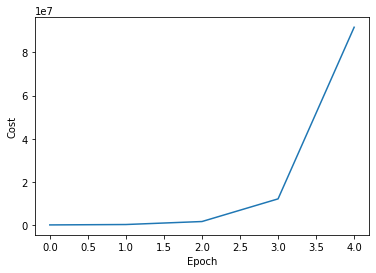

In [40]:
def plot_cost_history(cost_history):
    plt.plot(cost_history)
    plt.xlabel("Epoch")
    plt.ylabel("Cost")

plot_cost_history(cost_history)

If you managed to plot the cost evolution, you can see that the algorithm is getting worse and worse. You will understand why in the next section!

### Learning Rate


If you look at the evolution of the cost, you can see that it increases at each epoch. This is not good: it should be decreasing in order to find the minimum of the cost function! This illustrate one common problem with gradient descent: a too large *learning rate*.

<img src="images/learning_rate.png" width="400px">

The learning rate, named $\alpha$ (alpha) is simply a number that we use to scale the parameter update: instead of subtracting the derivative from `theta1`, we will multiply the derivative with a small number (for instance $\alpha=0.1$) before doing the subtraction.

You can create a new `update()` function that implements the learning rate. Make it as a parameter: it will allows us to play with this hyper-parameter!

In [36]:
# Your code here
def update_lr(x, y, theta0, theta1, alpha):
    # TODO: add the learning to the update function
    pass

In [41]:
def update_lr(x, y, theta0, theta1, alpha):
    new_theta1 =  theta1 - (alpha * (cost_function_derivative(x, y, theta0, theta1)))
    return theta0, new_theta1


To test your new `update_lr()` function, you can run the following cell:

In [42]:
update_lr(x=data['Zinc (mg/100g)'],
          y=data['Phosphorus (mg/100g)'],
          theta0=0,
          theta1=-300,
          alpha=1)
# You should get (0, 1245.3562264150944)

(0, 1245.3562264150944)

In [43]:
update_lr(x=data['Zinc (mg/100g)'],
          y=data['Phosphorus (mg/100g)'],
          theta0=0,
          theta1=-300,
          alpha=0.1)
# You should get (0, -145.46437735849054)

(0, -145.46437735849054)

Now, you can modify the function `gradient_descent()` to be sure that it uses the update including the learning rate. Use also $\alpha$ as a parameter of this function.

In [44]:
# Your code here
def gradient_descent_lr(x, y, theta0, theta1, alpha, num_epochs=5, viz=True):
    # TODO: this function should be similar to gradient_descent() but using
    # the learning rate
    pass

In [45]:
def gradient_descent_lr(x, y, theta0, theta1, alpha, num_epochs=5, viz=True):
    cost_history = []
    counter = 0
    for epoch in range(num_epochs):
        cost_for_theta1 = L(x, y, theta0, theta1)
        cost_history.append(cost_for_theta1)
                    
        if viz:
            gradient_descent_viz(x, y, theta0, theta1)
            
        counter += 1
        theta0, theta1 = update_lr(x, y, theta0, theta1, alpha)
        
    print(f"theta1: {theta1}")
    return cost_history, theta1

To check this new function, you will train your linear regression algorithm with a learning rate $\alpha$ of 0.1. Then, plot the evolution of the cost to see if it is better! To make it more visual, you can start with a very bad `theta1` value. Use -300 as an initial value of `theta1`, and still 5 epochs.


In [46]:
# Your code here


In [47]:
cost_history, best_theta1 = gradient_descent_lr(x=data['Zinc (mg/100g)'],
                                             y=data['Phosphorus (mg/100g)'],
                                             theta0=0,
                                             theta1=-300,
                                             alpha=0.1,
                                             num_epochs=5,
                                             viz=True)

theta1: 72.65082244878946


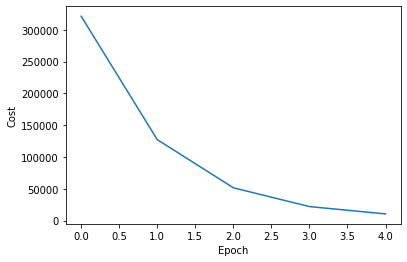

In [48]:
plot_cost_history(cost_history)

That's better! The cost is decreasing: this means that your algorithm is learning. As a final step, you can train your algorithm with more epochs (`viz=False` to speed up the learning phase) and plot the regression line. You can play with the initial value of `theta1`, or the value of the hyper-parameter `alpha` to see if you can get a lower cost.

In [49]:
# Your code here


In [50]:
cost_history, best_theta1 = gradient_descent_lr(x=data['Zinc (mg/100g)'],
                                             y=data['Phosphorus (mg/100g)'],
                                             theta0=0,
                                             theta1=300,
                                             alpha=0.1,
                                             num_epochs=20,
                                             viz=False)

theta1: 111.87815015117488


3084.175046393436


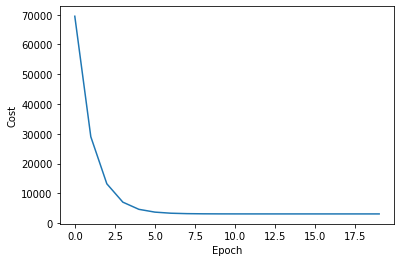

In [51]:
plot_cost_history(cost_history)
print(np.min(cost_history))

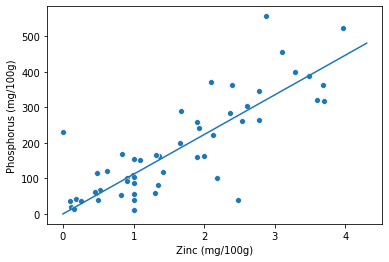

In [52]:
plot_reg_line(x=data['Zinc (mg/100g)'],
              y=data['Phosphorus (mg/100g)'],
              theta0=0,
              theta1=best_theta1)

## Stochastic Gradient Descent

The gradient descent algorithm we implemented used the whole dataset at each epoch. This is called *batch gradient descent*. It can be slow if the dataset is large. In contrary, with *stochastic gradient descent* (SGD), only one data sample is used at each iteration. This allows us to fit large datasets since only one sample would be in memory at a time. It can also be useful when the cost function is not perfectly convex and has local minima: the stochastic nature of the SGD makes it more equipped to escape those local minima.

You will implement SGD by modifying the previous function `gradient_descent_lr()`. At each epoch, you will update `theta1` once per data sample. To avoid cycles, you can choose a random index at each step. The update uses only the data sample corresponding to the random index.

To save the `cost_history`, take the average of the cost for an entire epoch. It will be useful to see if the cost is decreasing. And storing the cost at each step would be very noisy.


In [53]:
# Your code here
def SGD(x, y, theta0, theta1, alpha, num_epochs=5, viz=True):
    # TODO: Implement the SGD algorithm
    pass

In [54]:
def SGD(x, y, theta0, theta1, alpha, num_epochs=5, viz=True):
    cost_history = []
    counter = 0
    m = x.shape[0]
    for epoch in range(num_epochs):
        cost_epoch = []
        for i in range(m):
            random_index = np.random.randint(m)
            
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
        
            cost_for_theta1 = L(xi, yi, theta0, theta1)
            cost_epoch.append(cost_for_theta1)

            if viz:
                gradient_descent_viz(x, y, theta0, theta1)
                
            counter += 1
            theta0, theta1 = update_lr(xi, yi, theta0, theta1, alpha)
        cost_history.append(np.mean(cost_epoch))
        
    print(f"theta1: {theta1}")
    return cost_history, theta1

You can look at how the cost is decreasing using your function and plotting the cost history.

In [55]:
# Your code here


In [56]:
cost_history, best_theta1 = SGD(x=data['Zinc (mg/100g)'],
                                             y=data['Phosphorus (mg/100g)'],
                                             theta0=0,
                                             theta1=300,
                                             alpha=0.01,
                                             num_epochs=15,
                                             viz=False)

theta1: 115.7185967752428


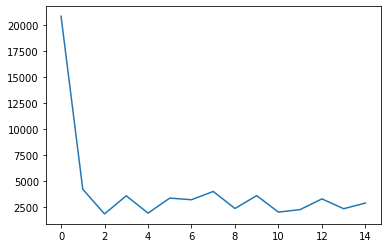

In [57]:
plt.plot(cost_history)

Congratulation! To conclude, the cost history plot shows that the cost is decreasing but is way more noisy than with batch gradient descent. This is due to the stochastic aspect of the algorithm. This is also possible to make a trade-off between these approaches and fit a certain number of data sample at each step (and not the whole dataset like with batch gradient descent or a single sample with stochastic gradient descent).
